In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [73]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2042,ham,"Me not waking up until 4 in the afternoon, sup",NaN,NaN,NaN
2391,ham,PICK UR FONE UP NOW U DUMB?,NaN,NaN,NaN
405,ham,"Haha get used to driving to usf man, I know a ...",NaN,NaN,NaN
629,spam,Todays Vodafone numbers ending with 4882 are s...,NaN,NaN,NaN
2653,ham,Sorry da:)i was thought of calling you lot of ...,NaN,NaN,NaN


In [74]:
df.shape

(5572, 5)

In [75]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [78]:
df.sample(5)

,v1,v2
866,ham,"Same here, but I consider walls and bunkers an..."
3238,ham,Am okay. Will soon be over. All the best
1077,ham,"Yep, by the pretty sculpture"
3401,ham,'An Amazing Quote'' - \Sometimes in life its d...
789,ham,Gud mrng dear hav a nice day


In [79]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
265,ham,Same. Wana plan a trip sometme then
333,ham,Any chance you might have had with me evaporat...
2982,ham,What should i eat fo lunch senor
5389,ham,Ok.ok ok..then..whats ur todays plan
2214,ham,Ok then i'll let him noe later n ask him call ...


In [80]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [81]:
df['target'] = encoder.fit_transform(df['target'])

In [82]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [84]:
# check for duplicate values
df.duplicated().sum()

403

In [85]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [86]:
df.duplicated().sum()

0

In [87]:
df.shape

(5169, 2)

## 2.EDA

In [88]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

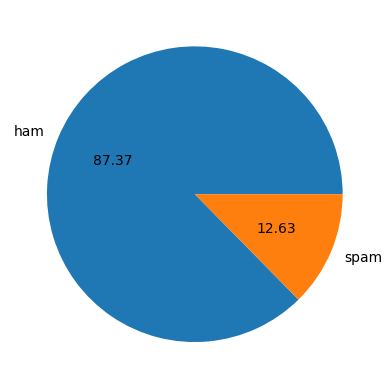

In [90]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [91]:
# Data is imbalanced

In [92]:
import nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
df['num_characters'] = df['text'].apply(len)

In [95]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [97]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [98]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [100]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [103]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

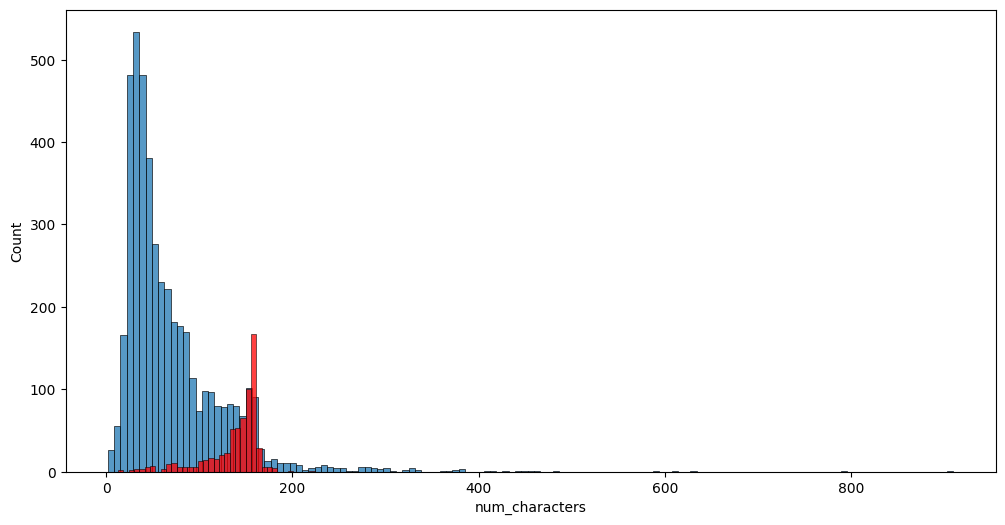

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

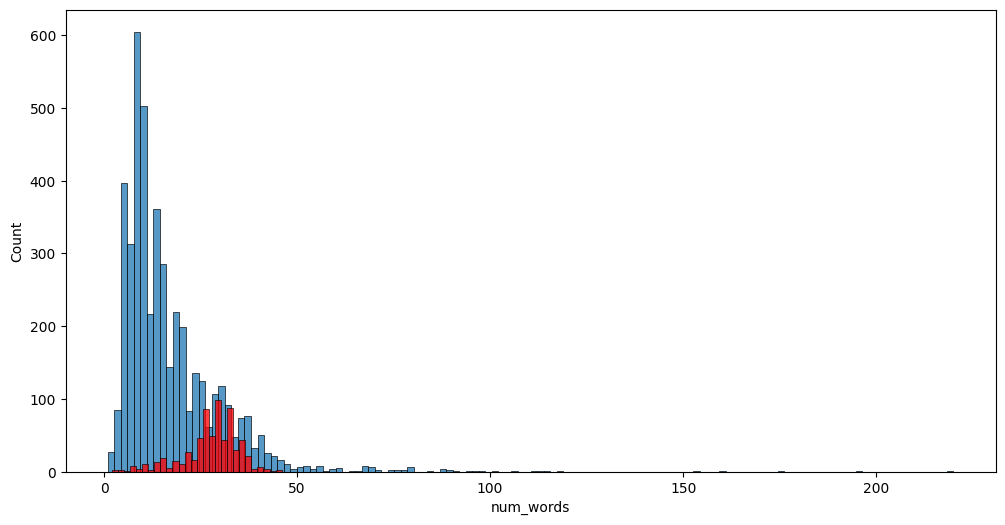

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

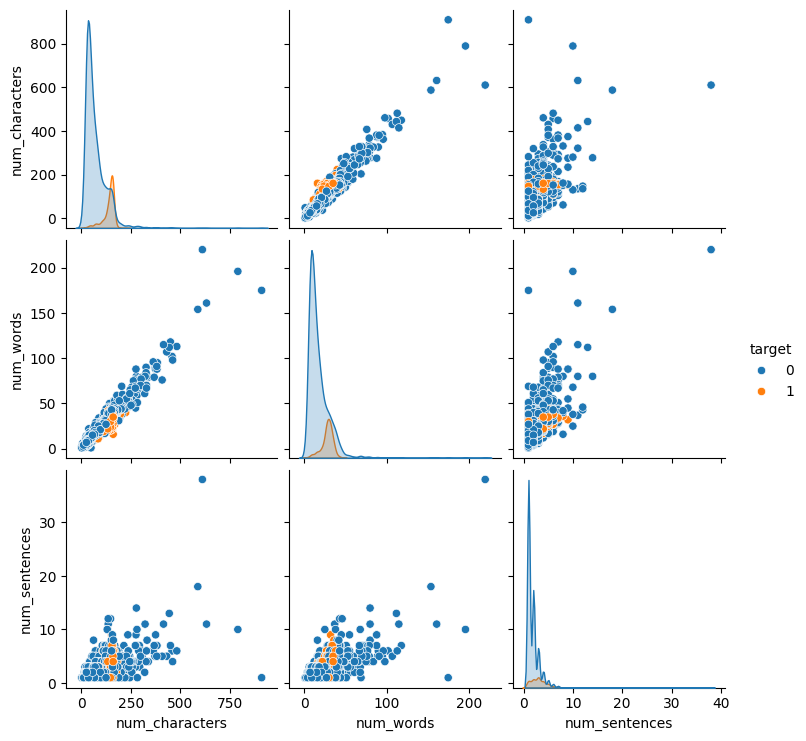

In [106]:
sns.pairplot(df,hue='target')

In [107]:
#sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [108]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopword')


[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index


False

In [109]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [110]:
example_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
result = transform_text(example_text)
print(result) 

gon na home soon want talk stuff anymor tonight k cri enough today


In [111]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [112]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [113]:
df['transformed_text'] = df['text'].apply(transform_text)

In [114]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [115]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [116]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

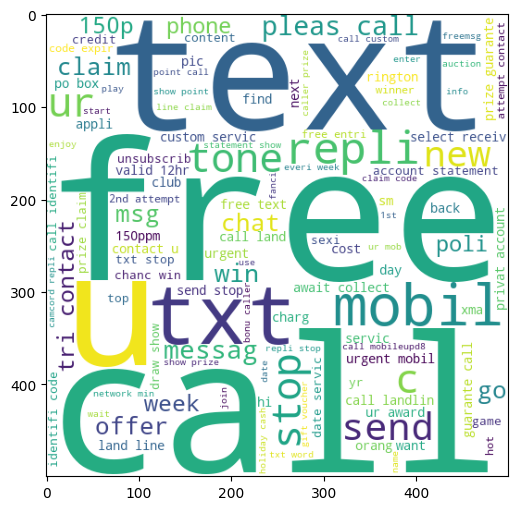

In [117]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [118]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

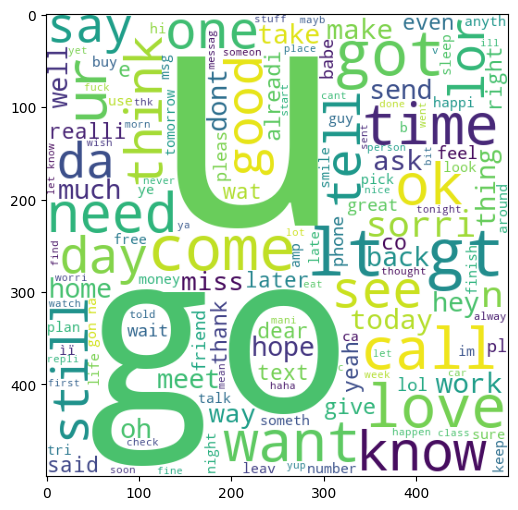

In [119]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [120]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [122]:
len(spam_corpus)

9939

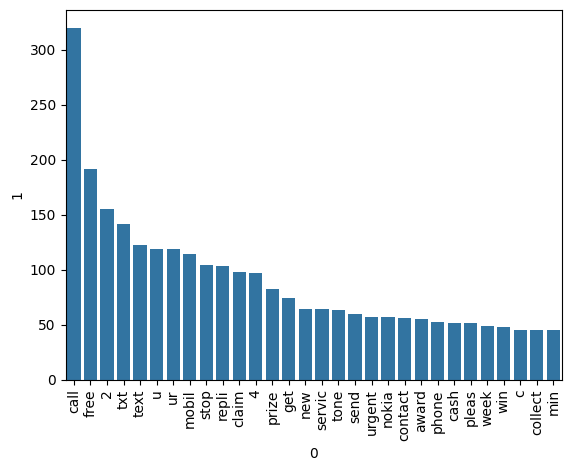

In [123]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [124]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [125]:
len(ham_corpus)

35404

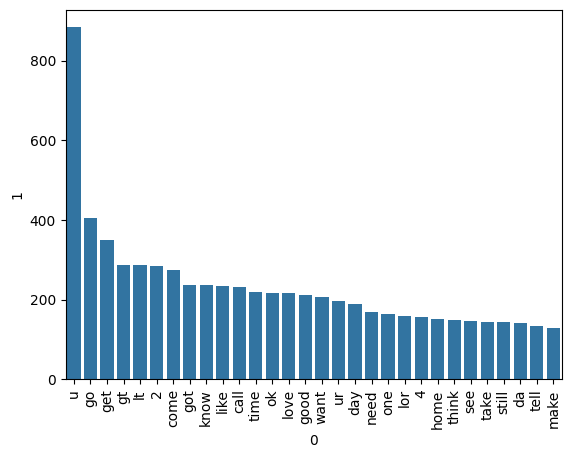

In [126]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [127]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [128]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [129]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [130]:
X.shape

(5169, 3000)

In [131]:
y = df['target'].values

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [134]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [135]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [136]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
0.5068493150684932


In [137]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
1.0


In [138]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
0.991869918699187


In [140]:
# Voting Classifier

bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

from sklearn.ensemble import VotingClassifier

In [141]:
voting = VotingClassifier(estimators=[('bnb', bnb), ('nb', mnb), ('gnb', gnb)],voting='soft')

In [142]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()), ('nb', MultinomialNB()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [143]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [144]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

         Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4  
     Category                                            Message  spam
0         ham  Go until jurong point, crazy.. Available only ...     0
1         ham                      Ok lar... Joking wif u oni...     0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3         ham  U dun say so early hor... U c already then say...     0
4         ham  Nah I don't think he goes to usf, he lives aro...     0
...       ...                                                ...   ...
5567     spam  This is the 2nd t

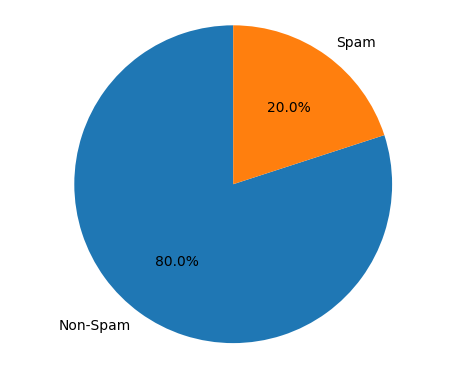

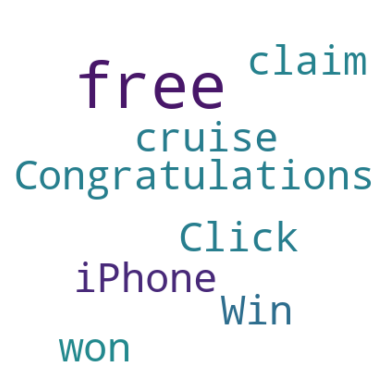

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import os
from ttkthemes import ThemedTk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from tkinter.scrolledtext import ScrolledText
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from wordcloud import WordCloud
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

spam_data = pd.read_csv("spam1.csv")

#inspect
print(spam_data.groupby('Category').describe())
spam_data['spam'] = spam_data['Category'].apply(lambda x: 1 if x =='spam' else 0)
print(spam_data)

x_train , x_test , y_train , y_test = train_test_split(spam_data.Message , spam_data.spam)

print(x_train.describe())

#find the total word count and store the data in numerical matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

print(x_train_count.toarray())

#train model
model = MultinomialNB()
model.fit(x_train_count,y_train)

print(MultinomialNB())

#testing ham
email_ham = ["Meet me in library ASAP"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

print(model.predict(email_ham_count))

#testing spam
email_spam = ["click the link below to win"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

print(model.predict(email_spam_count))

#testing model
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

print(model.score(x_test_count,y_test))

# Function to predict if the email is spam or ham
def predict_spam():
    email_text = text_entry.get()  # Get the text from the entry field
    if not email_text:
        messagebox.showinfo("Invalid Input", "Please enter some text")
        return
    
    # Simulate a loading effect
    loading_label.config(text="Detecting...")
    root.update_idletasks()  # Forces an update to show the animation
    time.sleep(1)  # Simulate processing time
    
    # Transform the input text using the CountVectorizer
    email_count = cv.transform([email_text])
    
    # Predict if it's spam or ham
    prediction = model.predict(email_count)
    
    # Display the result in a styled message box
    if prediction[0] == 1:
        result_text = "❌ This email is spam!"
        messagebox.showinfo("Spam Detection Result", result_text, icon="error")
    else:
        result_text = "✅ This email is not spam!"
        messagebox.showinfo("Spam Detection Result", result_text, icon="info")
    
    # Clear the loading text
    loading_label.config(text="")
    
    # Log the prediction in the prediction history
    prediction_history.insert(tk.END, f"Input: {email_text}\nResult: {result_text}\n---\n")

# Function to create a spam word cloud
def create_word_cloud():
    # Sample text data for creating a word cloud (could be generated from actual spam data)
    spam_text = "Congratulations! You've won a free iPhone. Click here to claim. Win a free cruise."
    
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(spam_text)
    
    # Create a figure for the word cloud
    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")  # Hide the axes
    
    # Create a new window for the word cloud
    wordcloud_window = tk.Toplevel(root)
    wordcloud_window.title("Spam Word Cloud")
    
    # Display the word cloud on the canvas
    canvas = FigureCanvasTkAgg(fig, wordcloud_window)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Function to save the prediction history to a file
def save_history():
    with open("prediction_history.txt", "w") as f:
        f.write(prediction_history.get("1.0", tk.END))
    messagebox.showinfo("Save History", "Prediction history saved to prediction_history.txt")

# Function to load prediction history from a file
def load_history():
    try:
        with open("prediction_history.txt", "r") as f:
            history_text = f.read()
        prediction_history.delete("1.0", tk.END)
        prediction_history.insert(tk.END, history_text)
        messagebox.showinfo("Load History", "Prediction history loaded.")
    except FileNotFoundError:
        messagebox.showinfo("Load History", "No saved history found.")

# Create a Tkinter window with enhanced visual elements
root = tk.Tk()
root.title("Spam Detection with Naive Bayes")
root.geometry("600x500")  # Larger window for additional elements
root.configure(bg="#303F9F")  # Background color for the window (blue-themed)

# Create a notebook (tabs) to organize the layout
notebook = ttk.Notebook(root)
notebook.pack(expand=True, fill=tk.BOTH)

# Create a frame for spam prediction functionality
spam_frame = ttk.Frame(notebook, padding=10)
notebook.add(spam_frame, text="Spam Prediction")

# Create a frame for data visualization (chart)
chart_frame = ttk.Frame(notebook, padding=10)
notebook.add(chart_frame, text="Data Visualization")

# Create a frame for additional features
features_frame = ttk.Frame(notebook, padding=10)
notebook.add(features_frame, text="Additional Features")

# Create the spam prediction widgets
label = ttk.Label(spam_frame, text="Enter email text:", foreground="#00008B")
label.pack(pady=(10, 5))  # Padding to the top and bottom

# Tooltip text when hovering over the label
def show_tooltip(event):
    tooltip.config(text="Enter the text to check for spam.")

def hide_tooltip(event):
    tooltip.config(text="")

label.bind("<Enter>", show_tooltip)  # Hover event for tooltips
label.bind("<Leave>", hide_tooltip)

# Create a tooltip label
tooltip = ttk.Label(spam_frame, text="", foreground="#FFC107", font=("Helvetica", 10))
tooltip.pack()

# Create a text entry field for spam prediction
text_entry = ttk.Entry(spam_frame, width=105)
text_entry.pack(pady=(0, 105))

# Create a loading label
loading_label = ttk.Label(spam_frame, text="", foreground="#FFEB3B", font=("Helvetica", 12, "bold"))
loading_label.pack(pady=(0, 105))

# Create a button for spam detection
predict_button = ttk.Button(spam_frame, text="🔍 Check if it's Spam", command=predict_spam)
predict_button.pack(pady=(0, 20))

# Create a text area for prediction history
prediction_history = ScrolledText(spam_frame, width=50, height=6, wrap=tk.WORD)
prediction_history.pack(pady=(0, 15))

# Create a pie chart for data visualization
fig, ax = plt.subplots()
ax.pie([80, 20], labels=["Non-Spam", "Spam"], autopct="%1.1f%%", startangle=90)
ax.axis("equal")

# Add the pie chart to the chart frame
canvas = FigureCanvasTkAgg(fig, chart_frame)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Add additional features to the additional features frame
create_word_cloud_button = ttk.Button(features_frame, text="Generate Spam Word Cloud", command=create_word_cloud)
create_word_cloud_button.pack(pady=(10, 10))  # Padding for spacing

save_history_button = ttk.Button(features_frame, text="Save Prediction History", command=save_history)
save_history_button.pack(pady=(10, 10))

load_history_button = ttk.Button(features_frame, text="Load Prediction History", command=load_history)
load_history_button.pack(pady=(10, 10))

# Run the Tkinter event loop
root.mainloop()
